# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 3
---
### <span style="color:red"> Due Date: 25.08.24 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **IN PAIRS** (unless the computer homework grader approved differently) until **<span style="color:red"> Thursday 25.08.2024 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    You should submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw3_id1_id2.pdf` where `id1`,`id2` are the ID numbers of the submitting students.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw3_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos) and all the files you created. make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory):
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---

In [2]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 

import scipy
import scipy.linalg as linalg

## <img src="https://img.icons8.com/dusk/64/000000/video-trimming.png" style="height:50px;display:inline"/> Part 1 - Sampling and Aliasing in Images
---
In This part we will sample images **in space and in time**, and examine the phenomenon of **aliasing** in both types of sampling. 

In order to do so, we will use the music video of the song Brothers in Arms by Dire Straits. 

Please use the download link available on the course moodle site. Copy the downloaded file to `given_data` folder.

You are encouraged to open the file `Dire Straits - Brothers In Arms.mp4`, to watch the video and appreciate the musical composition.

### 1.a - Spatial Sampling:
1. Sample the last frame from the 50th second of the `Dire Straits - Brothers In Arms.mp4` video and display it. You may use the `video_to_frames` function from your second python HW.

For the spatial sampling in this section we will use a rotated version of this frame, and focus on the region in the frame which contains the neck of the guitar, as seen in the red rectangle in the following figure.

We will focus on counting the string shadows in the red marked area.

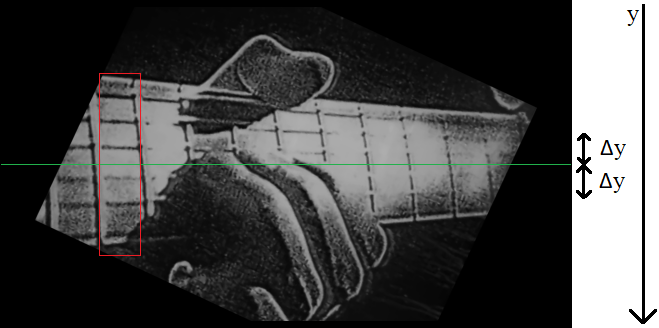

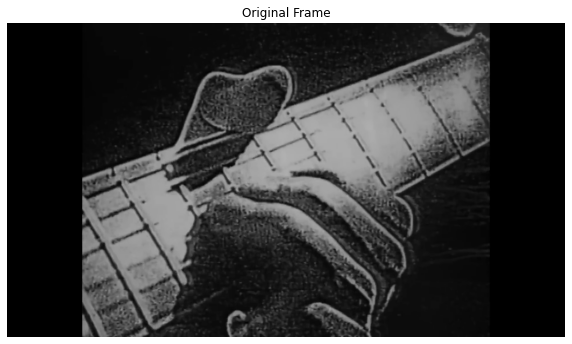

In [3]:
def video_to_frames(vid_path: str, start_second, end_second):
    """
    Load a video and return its frames from the wanted time range.
    :param vid_path: video file path.
    :param start_second: time of first frame to be taken from the 
                         video in seconds.
    :param end_second: time of last frame to be taken from the 
                         video in seconds.
    :return:
        frame_set: a 4D uint8 np array of size [num_of_frames x H x W x C] 
                   containing the wanted video frames.
    """
    video = cv2.VideoCapture(vid_path)
    frame_rate = video.get(cv2.CAP_PROP_FPS)
    num_frames = int((end_second - start_second) * frame_rate)
    frames = []
    for i in range(num_frames):  
        frame_number = int(i + frame_rate * start_second)
        video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        _, frame = video.read()
        frames.append(frame)
    video.release() 
    frame_set = np.array(frames)       
    return frame_set
video_path = os.path.join('..','given_data', 'Dire Straits - Brothers In Arms.mp4')
video = cv2.VideoCapture(video_path)
frame_rate = video.get(cv2.CAP_PROP_FPS)
frame = video_to_frames(video_path,50,51)[-1]
plt.figure(figsize=(10, 10))
plt.imshow(frame)
plt.title('Original Frame')
plt.axis('off')
plt.show()


Before examining a specific row in the image, we'd like to rotate the image around its center.

Use the provided function `rotate` using `cv2.getRotationMatrix2D` and `cv2.warpAffine` to rotate the image.

The function `rotate` returns the rotated image, given the arguments:
1. `image` - the original image to rotate.
2. `angle` - the rotation angle (degrees).

In [4]:
##### Given code
def rotate(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], 
                            flags=cv2.INTER_LINEAR)
    return result

From now on, work with the rotated image.

Display the rotated image, using `angle` value in the interval $[-20, -30]$. 

Choose a value that places the guitar neck horizontally. 

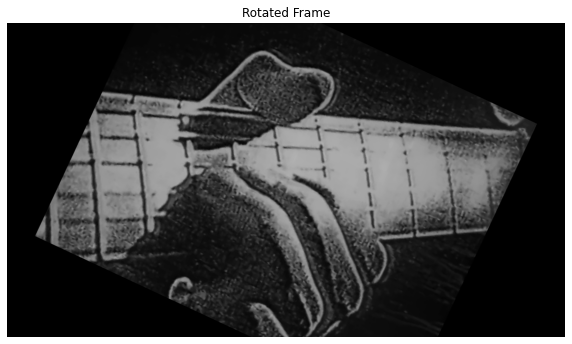

In [5]:

rotated_frame = rotate(frame, -25)

plt.figure(figsize=(10, 10))
plt.imshow(rotated_frame)
plt.title('Rotated Frame' )
plt.axis('off')
plt.show()

2 .  Let us examine the `400`th column of the image. 

Create a copy of the rotated image in which this column is marked in red and display it.

In addition, create and display a graph containing the gray levels of the `400`th column of one of the color channels (your choice) as a function of the row index.

How many shadows can you identify from the gray level profile?

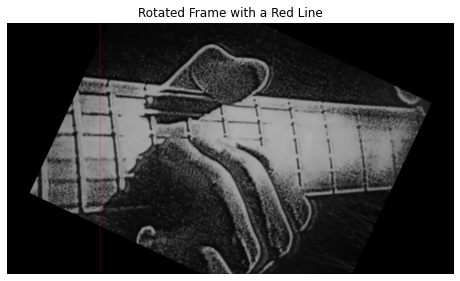

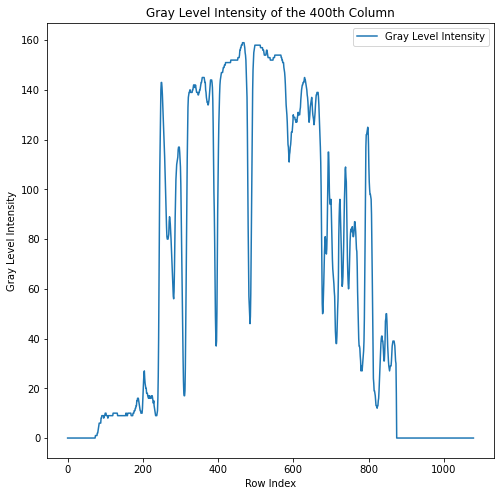

In [6]:
copy_of_rotated_frame = rotated_frame.copy()
copy_of_rotated_frame[:, 400, :] = [255, 0, 0]
plt.figure(figsize=(8, 8))
plt.imshow(copy_of_rotated_frame)
plt.title('Rotated Frame with a Red Line')
plt.axis('off')
plt.show()
channel = 0
H, W, _ = rotated_frame.shape
gray_level_array = []
for i in range(H):
    gray_level_array.append(rotated_frame[i, 400, channel])
plt.figure(figsize=(8, 8))
plt.plot(gray_level_array)
plt.legend(['Gray Level Intensity'])
plt.title('Gray Level Intensity of the 400th Column')
plt.xlabel('Row Index')
plt.ylabel('Gray Level Intensity')
plt.show()
   


3 . Now, for the spatial sampling: sample the image with sampling interval of $\Delta y=58$ (meaning - sample only the rows of the image, with no sampling on the $x$-axis). 

The sampling will start at the middle of the image (the green line in the above figure) and continue towards both directions (i.e., the central row of the image is sampled, and then all the rows in the image that are of $n\cdot\Delta y$ distance from it, for $n\in\mathbb{Z}$ (within image borders, of course)). 

Display the sampled image and a copy of the original image in which the sampled rows are marked in red.

(19, 1920, 3)


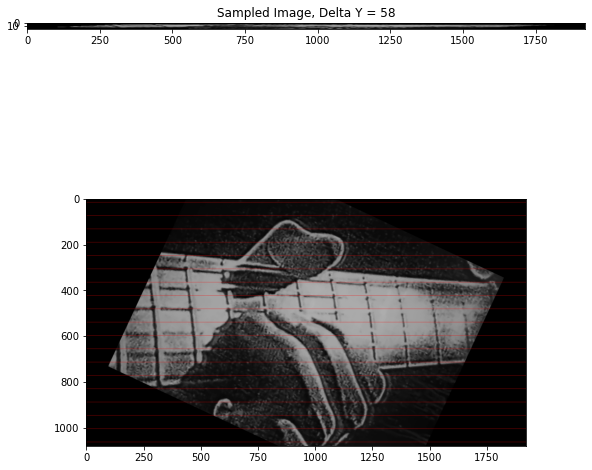

In [7]:
frame_copy = rotated_frame.copy()
top_of_the_image = frame_copy[int(H/2):0:-58, :, :]
bottom_of_the_image = frame_copy[int(H/2)+58::58, :, :]
top_of_the_image = top_of_the_image[::-1, :, :]  #Flip the Array
sampled_frame = np.concatenate((top_of_the_image, bottom_of_the_image), axis=0)
print(sampled_frame.shape)
frame_copy[int(H/2):0:-58, :, :] = [255, 0, 0]
frame_copy[int(H/2)+58::58, :, :] = [255, 0, 0]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(sampled_frame)
plt.title('Sampled Image, Delta Y = 58')
plt.subplot(2,1,2)
plt.imshow(frame_copy)
plt.show()


4 . In order to evaluate the result of sampling we would like to return the image to its original dimensions. 

We will do so by interpolating on the row dimension, using `cv2.resize` that uses bilinear interpolation by default. Return the sampled image to its original dimensions and display the result.

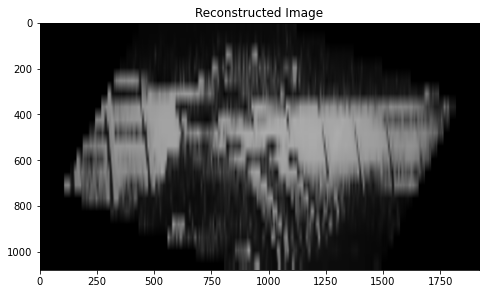

In [8]:
reconstructed_frame = cv2.resize(sampled_frame, (W,H))
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(reconstructed_frame)
plt.title('Reconstructed Image')
plt.show()

5 . Examine our region of interest (the red rectangle in section 1.a.1) in your new image.

How many string shadows can you identify? What's causing this effect?

Create and display a graph containing the gray levels of the `400`th column in one of the color channel you previously chose as a function of the row index for the interpolated image.

What are the differences between this graph and the graph from section 1.a.2? Explain.

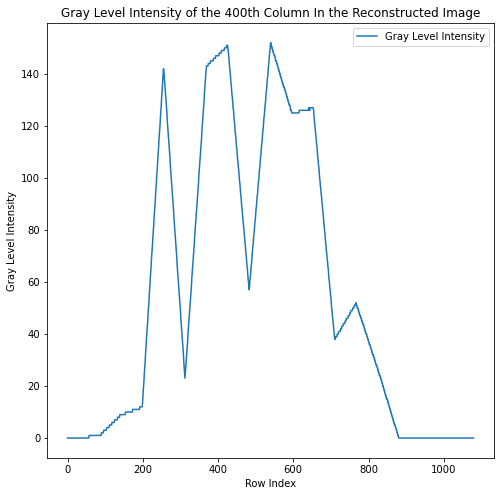

In [9]:
sampled_frame_gray_level_array = []
for i in range(H):
    sampled_frame_gray_level_array.append(reconstructed_frame[i, 400, channel])
plt.figure(figsize=(8, 8))
plt.plot(sampled_frame_gray_level_array)
plt.legend(['Gray Level Intensity'])
plt.title('Gray Level Intensity of the 400th Column In the Reconstructed Image')
plt.xlabel('Row Index')
plt.ylabel('Gray Level Intensity')
plt.show()

### 1.b - Temporal Sampling:
1. In this part we would like to perform a temporal sample on a time section from the video. Watch the time section between the seconds `10-20`.

In this part we will use only this time section. 

What is the frequency of the pendulum? You may use the `video_to_frames` function from your last python HW.

In [10]:
# The period time of the pendulum is 10/3 seconds, and the frequency is 3/10 Hz.


2 . Sample the time section with sampling interval of $\Delta p=37$ (meaning - the frames indexed 0, 37, 74, etc...). 

In order to examine the influence of the temporal sampling, create a new video having the duration of the original time section (10 seconds) and the same FPS rate.

In order to do so, use Zero-Order Hold interpolation: every frame in your sampled video will be translated in the new video into $\Delta p=37$ consecutive frames. 

Create the video and save it in `mp4` format. **Attach the video to your submission in the my_data folder**. (Note that the video does not need to contain sound).

In [11]:
def matrix_to_video(frames, output_filename='Reconstructed_video.mp4', fps=25):
    num_of_frames, H, W, C = frames.shape
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 file
    out = cv2.VideoWriter('../my_data/Reconstructed_video.mp4', fourcc, fps, (W, H))
    
    for i in range(num_of_frames):
        frame = frames[i]
        out.write(frame)
    
    # Release everything if job is finished
    out.release()
    print(f"Video saved as {output_filename}")
original_video = video_to_frames(video_path, 10,20)
zero_order_hold_video = original_video[::37,:,:,:]
zero_order_hold_video = np.repeat(zero_order_hold_video, 37, axis=0)
zero_order_hold_video = zero_order_hold_video[:original_video.shape[0],:,:,:]
matrix_to_video(zero_order_hold_video, 'Zero_order_hold_video.mp4', frame_rate)


Video saved as Zero_order_hold_video.mp4


3 . Watch the video you created - What is the difference comparing to the original video? What is the minimal $\Delta p$ to choose, if the desired result is a video with the pendulum staying in its place?

## <img src="https://img.icons8.com/?size=100&id=033FxKOjMQph&format=png&color=000000" style="height:50px;display:inline"/> Part 2 - Restoration With a Learned Parameter
---

In this section, you will learn how to empirically choose a parameter to optimize an image restoration given a known distortion matrix. 

For the degradation of the image we will use a part of the JPEG compression pipeline.

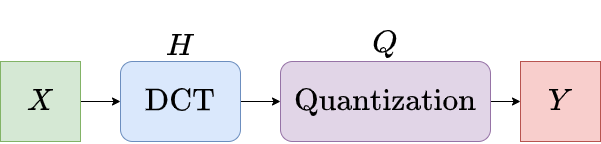


JPEG divides the image to `8x8` blocks. Each block is proccessed through the pipeline above. 

In this exercise you are given $N$ non-degraded images: $\{X_i\}_{i=0}^{N-1}$.

Using these we'll create degraded images $\{Y_i\}_{i=0}^{N-1}$ of shape `32x32`, passing the clean images thorugh the pipeline above (with block matrices).

We'll define our training set and our test set:

* $\mathcal{S}_{train} = \{(X_i, Y_i)\}_{i=0}^{N-1}$ - A train set consisting N pairs of images, each of size `32x32` pixels.
* $\mathcal{S}_{test} = \{(X_i, Y_i)\}_{i=0}^{N-1}$ - A test set consisting N pairs of images, each of size `32x32` pixels.

Then we'll use the training set to choose the learned parameter.

After choosing a parameter we'll evaluate the image restoration using the test set.

Below we provide a code that loads the data needed for this exercise.

* `train_set` - a list of images that will be used for training, i.e., finding the learned parameter .
* `test_set` - a list of images that will be used for evaluating the chosen parameter.

Note that each image in both sets is a grayscale image of shape `32x32`.

<!-- Notation for this part:
* $\mathcal{S}_{train} = \{(X_i, Y_i)\}_{i=0}^{N-1}$ - A train set consisting N pairs of images, each from size `32x32` pixels.
* $\mathcal{S}_{test} = \{(X_i, Y_i)\}_{i=0}^{N-1}$ - A test set consisting N pairs of images, each from size `32x32` pixels.
* $X_i$ - Original image.
* $Y_i$ - Distorted image.
* $H$ - The distortion matrix.
* $Q$ - The quantization matrix.
* $D$ - The laplacian matrix.
* $\lambda$ - The learned parameter.
* $L$ - The matrix rows/columns dimension. -->

In [12]:
##### Given Code
import pickle
N_ds = 20
with open('..\given_data\data_batch_1', 'rb') as file:
    ds = pickle.load(file, encoding="bytes")

class_indices = [i for i, item in enumerate(ds[b'labels']) if item == 1][:40]
train_set = [cv2.cvtColor(ds[b'data'][index].reshape(3, 32, 32).transpose(1, 2, 0), 
                          cv2.COLOR_RGB2GRAY) for index in class_indices[:N_ds]]
test_set = [cv2.cvtColor(ds[b'data'][index].reshape(3, 32, 32).transpose(1, 2, 0),
                          cv2.COLOR_BGR2GRAY) for index in class_indices[N_ds:]]


## 2.a Distorting the images

You will use the Discrete Cosine Transform (DCT) matrix as the basis to the distortion matrix.

The DCT matrix is defined by the following formula:

$$H[r,k] = c(k) \cos\left[\frac{(2r+1)k\pi}{2L}\right]$$

Where:

$$c(k) = \begin{cases} \sqrt{\frac{1}{L}} & k=0 \\ \sqrt{\frac{2}{L}} & else \end{cases}$$

The DCT transformation is defined as:

$$\mathrm{DCT}(X) = H^T X H$$

Implement the function `get_H`. The function returns $H$ as defined above, given a parameter defining the height and width of the matrix (for a square block).

The function arguments are:
* `l` - the height and width of the DCT matrix.
* The function returns a DCT matrix $H$ of size `lxl`.


In [13]:
def get_H(l: int = 8) -> np.ndarray:
    """
    l - the height and width of the DCT matrix.
    ============================================
    Returns a DCT matrix H of size [l, l].
    """
    
    H = np.zeros((l, l))
    for r in range (l):
        for k in range (l):
            if k == 0:
                H[r,k] = (np.sqrt(1/l))*np.cos((2*r+1)*k*np.pi/(2*l))
            else:
                H[r,k] = (np.sqrt(2/l))*np.cos((2*r+1)*k*np.pi/(2*l))
    return H
    

Display $H$ for `l=8`. We will use this $H$ for the remainder of this exercise.

Sanity check: to assure your $H$ is correct you can check if $H^TH=I$. 

In [20]:
def check_identity(H: np.ndarray) -> bool:
    """
    Checks if H^T * H is approximately the identity matrix.
    """
    # Calculate H^T (transpose of H)
    H_T = np.transpose(H)
    
    # Multiply H^T with H
    HTH = np.dot(H_T, H)
    
    # Create an identity matrix of the same size
    I = np.identity(H.shape[0])
    
    # Check if HTH is approximately equal to I
    return np.allclose(HTH, I)
H = get_H(8)
print(check_identity(H))
print(H)





True
[[ 0.35355339  0.49039264  0.46193977  0.41573481  0.35355339  0.27778512
   0.19134172  0.09754516]
 [ 0.35355339  0.41573481  0.19134172 -0.09754516 -0.35355339 -0.49039264
  -0.46193977 -0.27778512]
 [ 0.35355339  0.27778512 -0.19134172 -0.49039264 -0.35355339  0.09754516
   0.46193977  0.41573481]
 [ 0.35355339  0.09754516 -0.46193977 -0.27778512  0.35355339  0.41573481
  -0.19134172 -0.49039264]
 [ 0.35355339 -0.09754516 -0.46193977  0.27778512  0.35355339 -0.41573481
  -0.19134172  0.49039264]
 [ 0.35355339 -0.27778512 -0.19134172  0.49039264 -0.35355339 -0.09754516
   0.46193977 -0.41573481]
 [ 0.35355339 -0.41573481  0.19134172  0.09754516 -0.35355339  0.49039264
  -0.46193977  0.27778512]
 [ 0.35355339 -0.49039264  0.46193977 -0.41573481  0.35355339 -0.27778512
   0.19134172 -0.09754516]]


Since we are dealing with images of size `32x32` we need to build a block matrix that will operate on each block separately. 

The block matrix is: 
$$\tilde{H} = \begin{pmatrix} H & 0 & 0 & 0 \\ 0 & H & 0 & 0 \\ 0 & 0 & H & 0 \\ 0 & 0 & 0 & H\end{pmatrix} \implies \tilde{H}^T = \begin{pmatrix} H^T & 0 & 0 & 0 \\ 0 & H^T & 0 & 0 \\ 0 & 0 & H^T & 0 \\ 0 & 0 & 0 & H^T\end{pmatrix}$$

After applying DCT on the images, we'd like to quantize the images to get the final distorted images. Use the given quantization matrix $Q$:

In [15]:
##### Given Code
Q = np.array(
    [
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]
    ]
)
Q.shape

(8, 8)

Note that $Q$ is of shape `8x8`. The quantization is applied element-wise, on each `8x8` block in our image. Think how to build a block matrix $\tilde{Q}$ of shape `32x32`, so you can apply quantization on the image.

To get the final distorted image $Y_i$, you should apply the following operations on each image $X_i$ :

$$Y = \mathrm{Quantization}(DCT(X)) = \mathrm{round}\left[\left(\tilde{H}^TX\tilde{H}\right)\oslash\tilde{Q}\right]$$

**Where the '$\oslash$' operator is an element-wise division.**

Implement the function `distort_image`. Given an image it returns the distorted image according to the above pipeline.

That is, applying block-DCT on the image, and then quantizing the results by dividing element-wise by $\tilde{Q}$.

The functions arguments:
* `image` - The image we want to distort. (You can assume it is shaped `32x32`).
* `H` - The DCT matrix, from shape `8x8`.
* `Q` - The quantization matrix, from shape `8x8`.

You can use `np.block` function to easily build the block matrices.

In [16]:
def distort_image(image: np.ndarray, H: np.ndarray, Q: np.ndarray) -> np.ndarray:
    """
    image - np.ndarray, from shape [32, 32]. The image to distort.
    H - DCT matrix, from shape [8, 8]
    Q - Quantization matrix, from shape [8, 8]
    ===============================================================
    Returns: The distorted image after applying DCT and quantization.
    """
    # Create block diagonal matrices
    H_tilde = np.block([[H if i == j else np.zeros_like(H) for j in range(4)] for i in range(4)])
    H_tilde_T = np.block([[H.T if i == j else np.zeros_like(H) for j in range(4)] for i in range(4)])
    
    # Apply the DCT transformation: Y = H^T * X * H
    Y = H_tilde_T @ image @ H_tilde
    
    # Divide each 8x8 block of Y by the quantization matrix Q
    Y_divided = np.zeros_like(Y)
    for i in range(0, Y.shape[0], 8):
        for j in range(0, Y.shape[1], 8):
            Y_divided[i:i+8, j:j+8] = np.round(Y[i:i+8, j:j+8] / Q)

    return Y_divided

Now, create two new lists: 

`train_set_distorted` - A list containing all of the training set images after applying the distortion.

`test_set_distorted` - A list containing all of the test set images after applying the distortion.

In [17]:
train_set_distorted = [distort_image(image, H, Q) for image in train_set]
test_set_distorted = [distort_image(image, H, Q) for image in test_set]

## 2.b Defining the optimization problem and finding the optimal parameter.

In order to restore $X$ from a distorted image $Y$ we define an optimization problem.

Its fidelity term compares the distorted image and the image after applying block-DCT.

Its regularization term is a prior on the smoothness of the image using a Laplacian filter with kernel:

$$D_{kernel} = \begin{pmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0\end{pmatrix}$$
$D_{kernel}$ operation matrix is defined as $D$.

We want to define our problem using column-stack versions of the images. So, we are going to use the following property:

$$(AXB)^{cs} = (B^T\otimes A)X^{cs}, \text{where } A \in \mathbb{R}^{N_1\times N_2}, X \in \mathbb{R}^{N_2\times N_3}, B \in \mathbb{R}^{N_3\times N_4},$$ 

Where '$\otimes$' operation is the Kronecker product between matrices.

Since $D$ is an operation matrix of a convolution kernel, we'd like to solve the problem in a column-stack setup:

$$\hat{X}^{cs} = \argmin_{X^{cs}} \left|\left|Y^{cs}-(\tilde{H}^T\otimes \tilde{H}^T)X^{cs}\right|\right|_2^2 + \lambda\left|\left|DX^{cs}\right|\right|_2^2$$

Where $\lambda$ is the regularization parameter we want to optimize.

The closed form solution of the above problem is:

$$\hat{X}^{cs} = (\lambda D^TD + I)^{-1}(\tilde{H}\otimes \tilde{H})Y^{cs}$$ 

Note that we'll use this closed form solution only when evaluating the test set.

Your task is to find a $\lambda$ that optimizes the empirical loss on the training set:

$$\mathcal{L}(\mathcal{S}_{train}) = \frac{1}{N}\sum_{i=0}^{N-1} \left|\left|Y^{cs}_i - (\tilde{H}^T\otimes \tilde{H}^T)X^{cs}_i\right|\right|_2^2 + \lambda \left|\left|DX^{cs}_i\right|\right|_2^2, \ \ \ X_i \in \mathcal{S}_{train}$$

Before moving on to calculating the loss, we need to convert the kernel matrix to an operation matrix.

Below you are given a function `to_operation` that calculates the 2D toeplitz matrix that acts as the operation matrix of a given kernel.

The function arguments are:
* `kernel` - The convolution kernel we want to transform to an operation matrix.
* `input_size` - a tuple containing the height and width of the image.

In [18]:
##### Given Code
def to_operation(kernel, input_size):
    # shapes
    k_h, k_w = kernel.shape
    i_h, i_w = input_size
    o_h, o_w = i_h, i_w
    # construct 1d conv toeplitz matrices for the kernel, with "same" padding
    n = i_h

    K1 = np.zeros((n,))
    K1[:2] = (kernel[1,1], kernel[1,2])
    K2 = np.zeros((n,))
    K2[:2] = (kernel[1,1], kernel[1,0])

    K = linalg.toeplitz(c=K2, r = K1)
    KK = np.identity(n)

    L1 = np.zeros((n,))
    L1[:2] = (kernel[2,1], kernel[2,2])
    L2 = np.zeros((n,))
    L2[:2] = (kernel[2,1], kernel[2,0])

    t=np.zeros(n)
    s= np.zeros(n)
    s[1] = 1
    L= linalg.toeplitz(c=L2, r = L1)
    LL= linalg.toeplitz(r = s, c = t)

    A = np.kron(LL, L) + np.kron(KK, K)

    L1 = np.zeros((n,))
    L1[:2] = (kernel[0,1], kernel[0,2])
    L2 = np.zeros((n,))
    L2[:2] = (kernel[0,1], kernel[0,0])

    L= linalg.toeplitz(c=L2, r = L1)
    LL= linalg.toeplitz(c = s, r = t)
    A = A + np.kron(LL, L)
    return A


Implement the function `calc_loss`. The function accepts the next arguments:
1. `Xset` - a list containing the original images. 
1. `Yset` - a list containing the distorted images.
1. `H` - The distortion matrix. In our case it's $H$, the DCT `8x8` matrix.
1. `D` - The convolution operation matrix.
1. `lambda_param` - $\lambda$, the learned parameter.

The function returns the loss $\mathcal{L}$ as presented above.

Note that you should flatten the images when computing the loss in a column-stack order.

In [24]:
def calc_loss(Xset: list, Yset: list, H: np.ndarray, D: np.ndarray, 
              lambda_param: np.float):
    """
    Xset - a list containing the original images
    Yset - a list containing the distorted images
    H - The ditortion matrix, DCT 8x8 matrix.
    D - The convolution operation matrix
    lambda_param - the learned parameter.
    ==============================================
    Returns: Loss value on the given sets.
    """
    #### Your code
    H_tilde_T = np.block([[H.T if i == j else np.zeros_like(H) for j in range(4)] for i in range(4)])
    loss_val = []
    for i, (original_img, result_img) in enumerate(zip(Xset, Yset)):
        Xi = original_img.ravel().reshape(-1, 1)
        Yi = result_img.ravel().reshape(-1, 1)
        loss_val.append((np.linalg.norm((Yi - (np.kron(H_tilde_T,H_tilde_T) @ Xi)), ord=2))**2 + lambda_param*(np.linalg.norm(D @ Xi, ord=2))**2)
    return np.mean(loss_val)


Iterate through the training set, examining multiple values of $\lambda$ to find the $\lambda$ value that minimizes the loss function.

Try first to iterate through values in logarithmic scale, e.g. $[0.01, 0.1, 1, 10, 100]$, and then fine tune the interval to find an optimal $\lambda$.

In [57]:
import numpy as np
def find_best_lambda(Xset, Yset, H, D, lambda_range):
    best_lambda = None
    best_loss = float('inf')
    
    for lambda_param in lambda_range:
        loss = calc_loss(Xset, Yset, H, D, lambda_param)
        print(f"Lambda: {lambda_param}, Loss: {loss}")
        
        if loss < best_loss:
            best_loss = loss
            best_lambda = lambda_param
    
    return best_lambda

lambda_range = [0, 0.001, 0.01, 0.1, 1, 10, 100]
best_lambda = find_best_lambda(train_set,train_set_distorted, H, to_operation(np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]), (32, 32)), lambda_range)
print(f"Best lambda: {best_lambda}")

Lambda: 0, Loss: 16381655.109220931
Lambda: 0.001, Loss: 16388158.553370927
Lambda: 0.01, Loss: 16446689.55072093
Lambda: 0.1, Loss: 17031999.524220936
Lambda: 1, Loss: 22885099.25922093
Lambda: 10, Loss: 81416096.60922095
Lambda: 100, Loss: 666726070.109221
Best lambda: 0


## 2.c Restoring images using the optimized parameter

Now, choose your best $\lambda$ value, i.e., the value which yields the smallest loss on the training set. 

Display an image, its distortion, and the restored image in a subplot.

Do the above for 3 different images from the test set (choose whatever images you want from the test set).

Note that you should calculate the restored image according to the closed form solution presented in section 2.b.

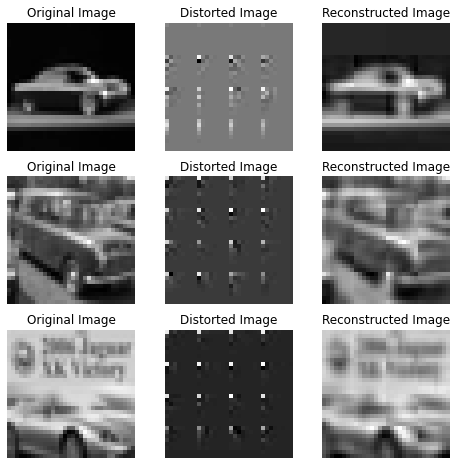

In [58]:
H_tilde = np.block([[H if i == j else np.zeros_like(H) for j in range(4)] for i in range(4)])
D = to_operation(np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]), (32, 32))
figure, axes = plt.subplots(3, 3, figsize=(8,8))
for i in range(3):
    x_hat = np.linalg.inv(best_lambda*D.T @ D + np.eye(D.shape[0],D.shape[1]))@(np.kron(H_tilde, H_tilde)) @ test_set_distorted[i].ravel().reshape(-1, 1)
    axes[i,0].set_title('Original Image')
    axes[i,0].imshow(test_set[i], cmap='gray')
    axes[i,0].axis('off')
    axes[i,1].set_title('Distorted Image')
    axes[i,1].imshow(test_set_distorted[i], cmap='gray')
    axes[i,1].axis('off')
    axes[i,2].set_title('Reconstructed Image')
    axes[i,2].imshow(x_hat.reshape(32,32), cmap='gray')
    axes[i,2].axis('off')
plt.show()


What can you say about the learned parameter $\lambda$ in this current setup? 

Does it help in the restoration process? How does it affect the restoration?

Experiment with different $\lambda$ values and explain your conclusions.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com